In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_df = pd.read_csv('Leads.csv')

In [4]:
main_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Total 9240 samples available having 37 columns

No Use of Id or index columns lets drop them

In [6]:
main_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

We see many columns have null values. Lets fix those missing values first

In [7]:
mssing_morethan_40 = main_df[main_df.columns[main_df.isna().mean() * 100 > 40]].columns

The above columns having more than 40% data missing so it would be better to drop the columns

In [8]:
main_df.drop(mssing_morethan_40, axis=1, inplace=True)

In [9]:
missing_morethan_30 = main_df[main_df.columns[main_df.isna().mean() * 100 > 30]].columns

In [10]:
missing_morethan_30

Index(['Tags'], dtype='object')

In [11]:
main_df.drop(missing_morethan_30, axis=1, inplace=True)

In [12]:
main_df[main_df.columns[main_df.isna().mean() * 100 > 20]]

,Country,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile
0,NaN,Select,Unemployed,Better Career Prospects,Select
1,India,Select,Unemployed,Better Career Prospects,Select
2,India,Select,Student,Better Career Prospects,Potential Lead
3,India,Word Of Mouth,Unemployed,Better Career Prospects,Select
4,India,Other,Unemployed,Better Career Prospects,Select
...,...,...,...,...,...
9235,Saudi Arabia,Select,Unemployed,Better Career Prospects,Potential Lead
9236,India,Select,Unemployed,Better Career Prospects,Potential Lead
9237,India,Select,Unemployed,Better Career Prospects,Potential Lead
9238,India,Online Search,NaN,NaN,NaN


In [13]:
main_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [14]:
main_df['Country'].mode()[0]

'India'

In [15]:
main_df['Country'].fillna(main_df['Country'].mode()[0], inplace=True) 

Renaming the occupation columns with simple name

In [16]:
main_df.rename({'What is your current occupation': 'Occupation'}, axis=1, inplace=True)

In [17]:
main_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Here select can be meaned as null value so lets replace all select values in all categorical variables to find missing values

In [18]:
# lets find all categorical columns
cat_cols = main_df.select_dtypes(include='object').columns
cat_cols


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'Occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
{column: main_df[column].nunique() for column in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Last Activity': 17,
 'Country': 38,
 'Specialization': 19,
 'How did you hear about X Education': 10,
 'Occupation': 6,
 'What matters most to you in choosing a course': 3,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'Lead Profile': 6,
 'City': 7,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

No object type seems to have many categories 

In [20]:
columns_having_select = [col for col in cat_cols if 'Select' in main_df[col].unique()]

Replacing the Select category with Null values as it does not signify any values

In [21]:
for col in columns_having_select:
    main_df[col] = main_df[col].replace('Select', np.nan)

Now Lets check again if any columns having large number of missing values

In [22]:
main_df[main_df.columns[main_df.isna().mean() * 100 > 30]]

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai
...,...,...,...,...
9235,IT Projects Management,NaN,Potential Lead,Mumbai
9236,Media and Advertising,NaN,Potential Lead,Mumbai
9237,Business Administration,NaN,Potential Lead,Mumbai
9238,Human Resource Management,Online Search,NaN,Other Metro Cities


In [23]:
main_df.drop(['How did you hear about X Education', 'Lead Profile'], axis=1, inplace=True)

In [24]:
main_df['Specialization'].fillna('Other', inplace=True)

In [25]:
main_df['City'].fillna('Other', inplace=True)

In [26]:
main_df[main_df.columns[main_df.isna().mean() * 100 > 0]]

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity,Occupation,What matters most to you in choosing a course
0,Olark Chat,0.0,0.00,Page Visited on Website,Unemployed,Better Career Prospects
1,Organic Search,5.0,2.50,Email Opened,Unemployed,Better Career Prospects
2,Direct Traffic,2.0,2.00,Email Opened,Student,Better Career Prospects
3,Direct Traffic,1.0,1.00,Unreachable,Unemployed,Better Career Prospects
4,Google,2.0,1.00,Converted to Lead,Unemployed,Better Career Prospects
...,...,...,...,...,...,...
9235,Direct Traffic,8.0,2.67,Email Marked Spam,Unemployed,Better Career Prospects
9236,Direct Traffic,2.0,2.00,SMS Sent,Unemployed,Better Career Prospects
9237,Direct Traffic,2.0,2.00,SMS Sent,Unemployed,Better Career Prospects
9238,Google,3.0,3.00,SMS Sent,NaN,NaN


In [27]:
cat_cols = main_df.select_dtypes(include='object').columns

In [28]:
num_cols = main_df.select_dtypes(exclude='object').columns

Filling categorical missing values with mode and numerical with mean

In [29]:
for col in cat_cols:
    main_df[col].fillna(main_df[col].mode()[0], inplace=True)
for col in num_cols:
    main_df[col].fillna(main_df[col].mean(), inplace=True)

In [30]:
main_df[main_df.columns[main_df.isna().mean() * 100 > 0]].columns

Index([], dtype='object')

All missing Values are taken care of here-----------------------------

## converting binary columns to 0 and 1 and other categorical columns to dummies

In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [32]:
main_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [33]:
{column: main_df[column].nunique() for column in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Last Activity': 17,
 'Country': 38,
 'Specialization': 19,
 'Occupation': 6,
 'What matters most to you in choosing a course': 3,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'City': 7,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

Lets check Binary categorical columns

In [34]:
{column: main_df[column].nunique() for column in cat_cols if main_df[column].nunique() <= 2}

{'Do Not Email': 2,
 'Do Not Call': 2,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2}

In [35]:
main_df['Do Not Email'] = main_df['Do Not Call'].map({'Yes':1, 'No':0})
main_df['Do Not Call'] = main_df['Do Not Call'].map({'Yes':1, 'No':0})
main_df['Search'] = main_df['Search'].map({'Yes':1, 'No':0})
main_df['Magazine'] = main_df['Magazine'].map({'Yes':1, 'No':0})
main_df['Newspaper Article'] = main_df['Newspaper Article'].map({'Yes':1, 'No':0})
main_df['X Education Forums'] = main_df['X Education Forums'].map({'Yes':1, 'No':0})
main_df['Newspaper'] = main_df['Newspaper'].map({'Yes':1, 'No':0})
main_df['Digital Advertisement'] = main_df['Digital Advertisement'].map({'Yes':1, 'No':0})
main_df['Through Recommendations'] = main_df['Through Recommendations'].map({'Yes':1, 'No':0})
main_df['Receive More Updates About Our Courses'] = main_df['Receive More Updates About Our Courses'].map({'Yes':1, 'No':0})
main_df['Update me on Supply Chain Content'] = main_df['Update me on Supply Chain Content'].map({'Yes':1, 'No':0})
main_df['Get updates on DM Content'] = main_df['Get updates on DM Content'].map({'Yes':1, 'No':0})
main_df['I agree to pay the amount through cheque'] = main_df['I agree to pay the amount through cheque'].map({'Yes':1, 'No':0})
main_df['A free copy of Mastering The Interview'] = main_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [36]:
main_df.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'Occupation',
       'What matters most to you in choosing a course', 'City',
       'Last Notable Activity'],
      dtype='object')

In [37]:
cat_cols = main_df.select_dtypes(include='object').columns

In [38]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'Occupation',
       'What matters most to you in choosing a course', 'City',
       'Last Notable Activity'],
      dtype='object')

In [39]:
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Last Activity': 17,
 'Country': 38,
 'Specialization': 19,
 'Occupation': 6,
 'What matters most to you in choosing a course': 3,
 'City': 7,
 'Last Notable Activity': 16}

Country has many values dummyfiying will create large number of columns lets observe the data

In [40]:
main_df['Country'].value_counts(normalize=True) * 100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

We see 96 % data are Domestic lets divide the category into Domestic and international

In [41]:
main_df['Country'] = main_df['Country'].map(lambda x: 'Domestic' if x == 'India' else 'International')

Lets check the Lead Source

In [42]:
main_df.drop(['Specialization'], axis=1, inplace=True)

In [43]:
main_df['Last Activity'].value_counts(normalize=True) * 100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [44]:
main_df['Last Notable Activity'].value_counts(normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

Last Notable Activity and Last Activity seems to be related data and most likely redudant data so we can drop one

In [45]:
main_df.drop(['Last Activity'], axis=1, inplace=True)

In [46]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Country': 2,
 'Occupation': 6,
 'What matters most to you in choosing a course': 3,
 'City': 7,
 'Last Notable Activity': 16}

In [48]:
main_df['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

We see here the column has alsmost 99.9% data same so it wont give much relation so lets drop it 

In [49]:
main_df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

Country also has almost 96% data Indian so we can drop country columns as well

In [50]:
main_df.drop(['Country'], axis=1, inplace=True)

In [51]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Origin': 5,
 'Lead Source': 21,
 'Occupation': 6,
 'City': 7,
 'Last Notable Activity': 16}

In [52]:
main_df['Occupation'].value_counts(normalize=True) * 100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

Here also If u exclude Working professional all others are unemployed only so more than 90% data are unEmployed lets drop it

In [53]:
main_df.drop(['Occupation'], axis=1, inplace=True)

In [54]:
main_df.drop(['City'], axis=1, inplace=True)

In [55]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{'Lead Origin': 5, 'Lead Source': 21, 'Last Notable Activity': 16}

In [56]:
main_df['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [57]:
LO = pd.get_dummies(main_df['Lead Origin'])
LO.drop('Quick Add Form', axis=1, inplace=True)
main_df = pd.concat([main_df, LO], axis=1)

In [58]:
main_df.drop('Lead Origin', axis=1, inplace=True)

In [59]:
main_df['Lead Source'].value_counts(normalize=True) * 100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [60]:
LS = pd.get_dummies(main_df['Lead Source'])
LS.drop('NC_EDM', axis=1, inplace=True)
main_df = pd.concat([main_df, LS], axis=1)

In [61]:
main_df.drop('Lead Source', axis=1, inplace=True)

In [62]:
main_df['Last Notable Activity'].value_counts(normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [63]:
LNA = pd.get_dummies(main_df['Last Notable Activity'])
LNA.drop('Email Received', axis=1, inplace=True)
main_df = pd.concat([main_df, LNA], axis=1)

In [64]:
main_df.drop('Last Notable Activity', axis=1, inplace=True)

In [65]:
cat_cols = main_df.select_dtypes(include='object').columns
{col:main_df[col].nunique() for col in cat_cols}

{}

Now we have converted all Categorical variables into numerical variables

## univariate analysis

In [66]:
num_cols = main_df.select_dtypes(exclude='object').columns

In [68]:
main_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.000216,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.014711,0.014711,0.486714,4.818723,548.021466,2.145333,0.038898,0.0,0.014711,0.010403,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split

In [70]:
# include sklearn train test split
from sklearn.model_selection import train_test_split

In [71]:
main_Train_df, main_Test_df = train_test_split(main_df, test_size=0.2, random_state=42)

In [72]:
y_Train = main_Train_df.pop('Converted')
X_Train = main_Train_df

## Feature scalling

In [69]:
from sklearn.preprocessing import StandardScaler

In [74]:
X_Train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
6487,0,0,2.0,239,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4759,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
scaller = StandardScaler()
main_scalled_df = scaller.fit_transform(X_Train)

Lets check for Data imbalance 

In [76]:
sum(main_df['Converted']) / len(main_df['Converted']) * 100

38.53896103896104

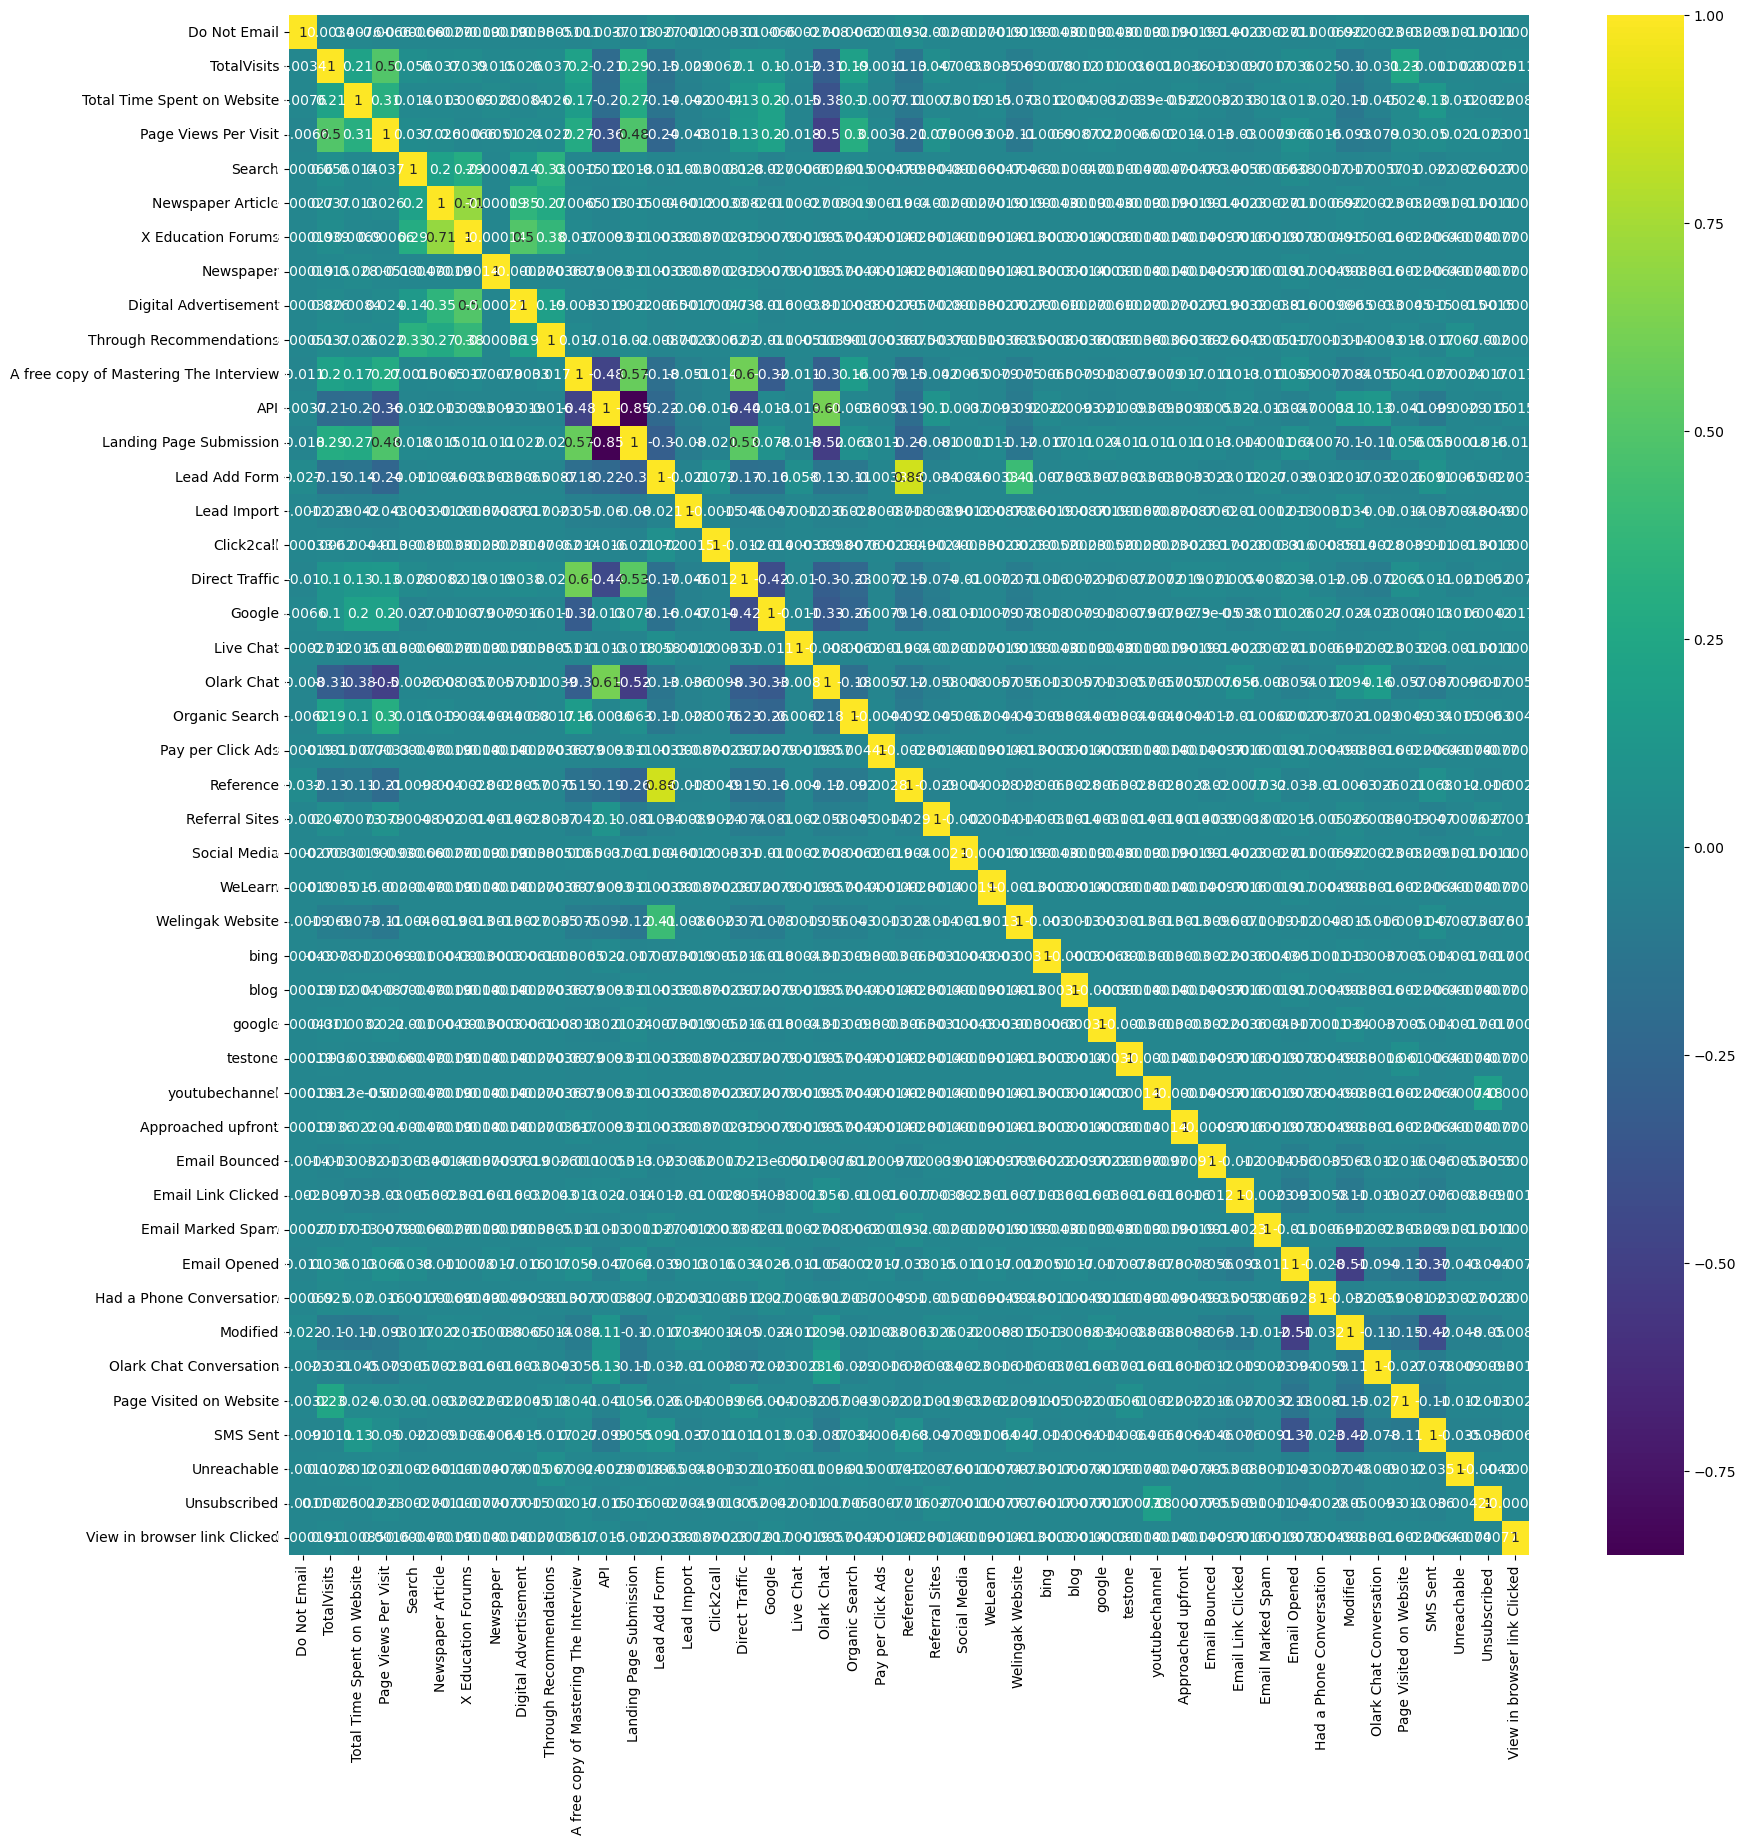

In [96]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_Train.corr(), annot=True, cmap='viridis')
plt.show()

In [80]:
X_Train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'API',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import', 'Click2call',
       'Direct Traffic', 'Facebook', 'Google', 'Live Chat', 'Olark Chat',
       'Organic Search', 'Pay per Click Ads', 'Press_Release', 'Reference',
       'Referral Sites', 'Social Media', 'WeLearn', 'Welingak Website', 'bing',
       'blog', 'google', 'testone', 'welearnblog_Home', 'youtubechannel',
       'Approached upfront', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Form Submitted 

In [81]:
X_Train.drop(['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [85]:
X_Train.drop(['Resubscribed to emails'], axis=1, inplace=True)

In [95]:
X_Train.drop(['Facebook'], axis=1, inplace=True)

In [83]:
X_Train.drop(['Do Not Call', 'Magazine',  'Press_Release', 'welearnblog_Home', 'Form Submitted on Website'], axis=1, inplace=True)

Lets remove the highly correlated features

In [97]:
import statsmodels.api as sm

In [98]:
logml = sm.GLM(y_Train, sm.add_constant(X_Train), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7346
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3328.9
Date:                Thu, 15 Feb 2024   Deviance:                       6657.8
Time:                        20:43:57   Pearson chi2:                 7.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3488
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     43.8517   1.12e+05      0.000      1.000    -2.2e+05     2.2e+05
Do Not Email                              22.6879   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                0.0354      0.011      3.243      0.001       0.014       0.057
Total Time Spent on Website                0.0021   6.58e-05     31.482      0.000       0.002       0.002
Page Views Per Visit                      -0.0574      0.022     -2.603      0.009      -0.101      -0.014
Search                                    -0.2718      0.798     -0.341      0.733      -1.835       1.292
Newspaper Article                         24.5570   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                       -49.3065   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
Newspaper                                -25.1302   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                     -0.2492      1.245     -0.200      0.841      -2.689       2.191
Through Recommendations                    2.5284      1.267      1.995      0.046       0.045       5.012
A free copy of Mastering The Interview     0.0592      0.094      0.627      0.531      -0.126       0.244
API                                      -21.6126   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Landing Page Submission                  -21.6787   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                            -19.2065   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Import                              -21.1567   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Click2call                                -0.3093      1.934     -0.160      0.873      -4.100       3.482
Direct Traffic                            -0.6655      1.257     -0.529      0.597      -3.130       1.799
Google                                    -0.2228      1.255     -0.178      0.859      -2.683       2.237
Live Chat                                 21.3877   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Olark Chat                                 0.4830      1.260      0.383      0.702      -1.987       2.953
Organic Search                            -0.4069      1.258     -0.323      0.746      -2.873       2.060
Pay per Click Ads                        -22.0738   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Reference                                  1.2286      1.361      0.903      0.367      -1.439       3.896
Referral Sites                            -0.5266      1.285     -0.410      0.682      -3.044       1.991
Social Media                               1.3142      1.984      0.662      0.508     

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X= X_Train, y= y_Train)

In [102]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True, False, False])

In [104]:
col_selected = X_Train.columns[rfe.support_]

In [105]:
X_Train = X_Train[col_selected]

In [106]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4004.9
Date:                Thu, 15 Feb 2024   Deviance:                       8009.7
Time:                        20:50:16   Pearson chi2:                 7.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2181
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       23.3141   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email                23.0352   2.79e+04      0.001      0.999   -5.46e+04    5.46e+04
Through Recommendations      1.6666      0.859      1.940      0.052      -0.017       3.351
API                        -24.0880   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Landing Page Submission    -24.0831   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Add Form              -22.3038   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Import                -24.0886   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Reference                    1.3487      0.489      2.761      0.006       0.391       2.306
Welingak Website             3.5662      1.107      3.222      0.001       1.397       5.735
bing                       -21.3795   2.12e+04     -0.001      0.999   -4.15e+04    4.15e+04
Email Bounced               -1.0674      0.409     -2.609      0.009      -1.869      -0.266
Had a Phone Conversation     3.2558      1.042      3.125      0.002       1.214       5.297
Modified                    -0.7481      0.066    -11.289      0.000      -0.878      -0.618
Olark Chat Conversation     -1.0606      0.247     -4.294      0.000      -1.545      -0.577
SMS Sent                     1.4114      0.068     20.718      0.000       1.278       1.545
Unreachable                  1.4335      0.411      3.486      0.000       0.628       2.239
============================================================================================
"""

In [107]:
X_Train.drop(['API'], axis=1, inplace=True)

In [108]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4006.6
Date:                Thu, 15 Feb 2024   Deviance:                       8013.2
Time:                        20:51:44   Pearson chi2:                 7.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2177
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7730      0.055    -13.985      0.000      -0.881      -0.665
Do Not Email                23.0328   2.79e+04      0.001      0.999   -5.46e+04    5.47e+04
Through Recommendations      1.6665      0.859      1.940      0.052      -0.017       3.350
Landing Page Submission      0.0035      0.057      0.061      0.952      -0.109       0.116
Lead Add Form                1.7825      0.458      3.889      0.000       0.884       2.681
Lead Import                 -0.0025      0.375     -0.007      0.995      -0.738       0.733
Reference                    1.3484      0.489      2.760      0.006       0.391       2.306
Welingak Website             3.5658      1.107      3.222      0.001       1.397       5.735
bing                       -21.3810   2.12e+04     -0.001      0.999   -4.16e+04    4.15e+04
Email Bounced               -1.0674      0.409     -2.609      0.009      -1.869      -0.266
Had a Phone Conversation     3.2558      1.042      3.125      0.002       1.214       5.297
Modified                    -0.7461      0.066    -11.265      0.000      -0.876      -0.616
Olark Chat Conversation     -1.0612      0.247     -4.297      0.000      -1.545      -0.577
SMS Sent                     1.4114      0.068     20.718      0.000       1.278       1.545
Unreachable                  1.4334      0.411      3.486      0.000       0.628       2.239
============================================================================================
"""

In [109]:
X_Train.drop(['Do Not Email'], axis=1, inplace=True)

In [110]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4008.5
Date:                Thu, 15 Feb 2024   Deviance:                       8017.0
Time:                        20:52:29   Pearson chi2:                 7.69e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2173
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7722      0.055    -13.973      0.000      -0.881      -0.664
Through Recommendations      1.6665      0.859      1.940      0.052      -0.017       3.350
Landing Page Submission      0.0021      0.057      0.037      0.970      -0.110       0.114
Lead Add Form                1.7807      0.458      3.886      0.000       0.883       2.679
Lead Import                 -0.0044      0.375     -0.012      0.991      -0.740       0.731
Reference                    1.3530      0.488      2.770      0.006       0.396       2.310
Welingak Website             3.5653      1.107      3.222      0.001       1.396       5.734
bing                       -20.3825   1.29e+04     -0.002      0.999   -2.52e+04    2.52e+04
Email Bounced               -1.0674      0.409     -2.609      0.009      -1.869      -0.266
Had a Phone Conversation     3.2558      1.042      3.125      0.002       1.214       5.297
Modified                    -0.7439      0.066    -11.237      0.000      -0.874      -0.614
Olark Chat Conversation     -1.0619      0.247     -4.299      0.000      -1.546      -0.578
SMS Sent                     1.4115      0.068     20.719      0.000       1.278       1.545
Unreachable                  1.4333      0.411      3.486      0.000       0.627       2.239
============================================================================================
"""

In [111]:
X_Train.drop(['bing'], axis=1, inplace=True)

In [112]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4009.8
Date:                Thu, 15 Feb 2024   Deviance:                       8019.7
Time:                        20:52:49   Pearson chi2:                 7.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7741      0.055    -14.009      0.000      -0.882      -0.666
Through Recommendations      1.6673      0.859      1.941      0.052      -0.016       3.351
Landing Page Submission      0.0033      0.057      0.057      0.954      -0.109       0.116
Lead Add Form                1.7824      0.458      3.889      0.000       0.884       2.681
Lead Import                 -0.0025      0.375     -0.007      0.995      -0.738       0.733
Reference                    1.3532      0.488      2.770      0.006       0.396       2.311
Welingak Website             3.5655      1.107      3.222      0.001       1.397       5.735
Email Bounced               -1.0662      0.409     -2.606      0.009      -1.868      -0.264
Had a Phone Conversation     3.2569      1.042      3.127      0.002       1.215       5.299
Modified                    -0.7441      0.066    -11.241      0.000      -0.874      -0.614
Olark Chat Conversation     -1.0602      0.247     -4.293      0.000      -1.544      -0.576
SMS Sent                     1.4126      0.068     20.736      0.000       1.279       1.546
Unreachable                  1.4345      0.411      3.489      0.000       0.629       2.240
============================================================================================
"""

In [113]:
X_Train.drop(['Lead Import'], axis=1, inplace=True)

In [114]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4009.8
Date:                Thu, 15 Feb 2024   Deviance:                       8019.7
Time:                        20:53:18   Pearson chi2:                 7.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7741      0.055    -14.078      0.000      -0.882      -0.666
Through Recommendations      1.6673      0.859      1.941      0.052      -0.016       3.351
Landing Page Submission      0.0033      0.057      0.058      0.954      -0.109       0.115
Lead Add Form                1.7824      0.458      3.889      0.000       0.884       2.681
Reference                    1.3532      0.488      2.770      0.006       0.396       2.311
Welingak Website             3.5655      1.107      3.222      0.001       1.397       5.735
Email Bounced               -1.0662      0.409     -2.606      0.009      -1.868      -0.264
Had a Phone Conversation     3.2570      1.042      3.127      0.002       1.215       5.299
Modified                    -0.7441      0.066    -11.241      0.000      -0.874      -0.614
Olark Chat Conversation     -1.0602      0.247     -4.293      0.000      -1.544      -0.576
SMS Sent                     1.4126      0.068     20.744      0.000       1.279       1.546
Unreachable                  1.4345      0.411      3.489      0.000       0.629       2.240
============================================================================================
"""

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Add Form,16.57
3,Reference,13.52
4,Welingak Website,3.91
1,Landing Page Submission,1.49
9,SMS Sent,1.31
7,Modified,1.27
0,Through Recommendations,1.01
5,Email Bounced,1.01
10,Unreachable,1.01
6,Had a Phone Conversation,1.00


In [117]:
X_Train.drop(['Landing Page Submission'], axis=1, inplace=True)

In [118]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7381
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4009.8
Date:                Thu, 15 Feb 2024   Deviance:                       8019.7
Time:                        20:56:12   Pearson chi2:                 7.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7720      0.042    -18.314      0.000      -0.855      -0.689
Through Recommendations      1.6682      0.859      1.942      0.052      -0.015       3.352
Lead Add Form                1.7805      0.457      3.895      0.000       0.885       2.676
Reference                    1.3533      0.488      2.770      0.006       0.396       2.311
Welingak Website             3.5656      1.107      3.222      0.001       1.397       5.735
Email Bounced               -1.0662      0.409     -2.606      0.009      -1.868      -0.264
Had a Phone Conversation     3.2570      1.042      3.127      0.002       1.215       5.299
Modified                    -0.7444      0.066    -11.304      0.000      -0.874      -0.615
Olark Chat Conversation     -1.0617      0.246     -4.324      0.000      -1.543      -0.580
SMS Sent                     1.4127      0.068     20.757      0.000       1.279       1.546
Unreachable                  1.4344      0.411      3.489      0.000       0.629       2.240
============================================================================================
"""

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Lead Add Form,16.53
2,Reference,13.52
3,Welingak Website,3.91
8,SMS Sent,1.05
6,Modified,1.02
9,Unreachable,1.01
0,Through Recommendations,1.00
4,Email Bounced,1.00
5,Had a Phone Conversation,1.00
7,Olark Chat Conversation,1.00


In [120]:
X_Train.drop(['Through Recommendations'], axis=1, inplace=True)

In [121]:
X_Train_sm = sm.add_constant(X_Train)
logml2 = sm.GLM(y_Train, X_Train_sm, family=sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7382
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.0
Date:                Thu, 15 Feb 2024   Deviance:                       8023.9
Time:                        20:57:07   Pearson chi2:                 7.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2166
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7685      0.042    -18.255      0.000      -0.851      -0.686
Lead Add Form                1.7789      0.457      3.892      0.000       0.883       2.675
Reference                    1.3532      0.488      2.770      0.006       0.396       2.311
Welingak Website             3.5656      1.107      3.222      0.001       1.397       5.735
Email Bounced               -1.0697      0.409     -2.615      0.009      -1.872      -0.268
Had a Phone Conversation     3.2534      1.042      3.123      0.002       1.212       5.295
Modified                    -0.7469      0.066    -11.347      0.000      -0.876      -0.618
Olark Chat Conversation     -1.0652      0.246     -4.338      0.000      -1.546      -0.584
SMS Sent                     1.4092      0.068     20.716      0.000       1.276       1.543
Unreachable                  1.4723      0.409      3.599      0.000       0.671       2.274
============================================================================================
"""

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Reference,5.14
2,Welingak Website,3.91
3,Email Bounced,1.00
4,Had a Phone Conversation,1.00
6,Olark Chat Conversation,1.00
8,Unreachable,1.00
0,Lead Add Form,0.91
7,SMS Sent,0.12
5,Modified,0.05


In [126]:
y_train_perd = logml2.fit().predict(X_Train_sm)
y_train_perd

6487    0.654915
4759    0.180127
4368    0.316796
1467    0.654915
5517    0.180127
          ...   
5734    0.316796
5191    0.180127
5390    0.977529
860     0.316796
7270    0.316796
Length: 7392, dtype: float64

In [127]:
y_train_perd_final = pd.DataFrame({'Converted': y_Train.values, 'Converted_prob': y_train_perd})
y_train_perd_final['Prospect ID'] = y_train_perd_final.index
y_train_perd_final.head()

,Converted,Converted_prob,Prospect ID
6487,0,0.654915,6487
4759,0,0.180127,4759
4368,0,0.316796,4368
1467,1,0.654915,1467
5517,0,0.180127,5517


In [128]:
y_train_perd_final['Predicted'] = y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [130]:
confusion = confusion_matrix(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])
print(confusion)

[[4000  572]
 [1285 1535]]


In [131]:
print(accuracy_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted']))

0.7487824675324676


In [132]:
print(precision_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted']))

0.7285239677266255


In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = roc_curve(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'], drop_intermediate = False )

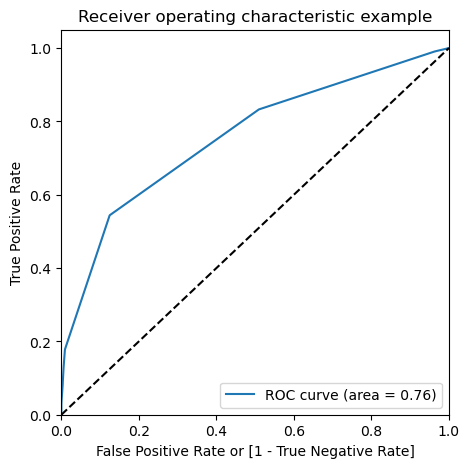

In [136]:
draw_roc(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'])

## Finding Optimal Cutoff point

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_perd_final[i]= y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_perd_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6487,0,0.654915,6487,1,1,1,1,1,1,1,1,0,0,0
4759,0,0.180127,4759,0,1,1,0,0,0,0,0,0,0,0
4368,0,0.316796,4368,0,1,1,1,1,0,0,0,0,0,0
1467,1,0.654915,1467,1,1,1,1,1,1,1,1,0,0,0
5517,0,0.180127,5517,0,1,1,0,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_perd_final['Converted'], y_train_perd_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381494  1.000000  0.000000
0.1   0.1  0.381494  1.000000  0.000000
0.2   0.2  0.620942  0.832624  0.490376
0.3   0.3  0.620942  0.832624  0.490376
0.4   0.4  0.748782  0.544326  0.874891
0.5   0.5  0.748782  0.544326  0.874891
0.6   0.6  0.748782  0.542908  0.875766
0.7   0.7  0.680871  0.178723  0.990595
0.8   0.8  0.680060  0.175887  0.991032
0.9   0.9  0.664367  0.129433  0.994313


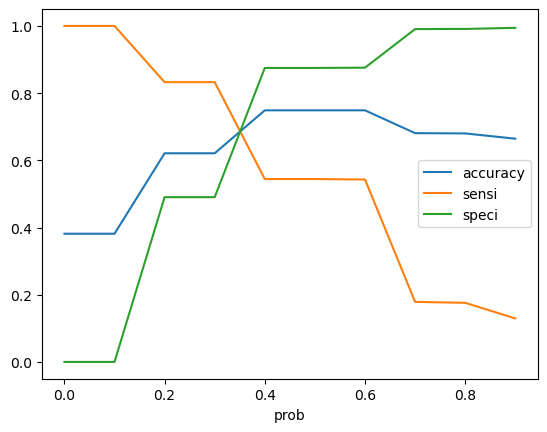

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [140]:
y_train_perd_final['final_predicted'] = y_train_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.35 else 0)


In [141]:
print(accuracy_score(y_train_perd_final['Converted'], y_train_perd_final['final_predicted']))

0.7487824675324676


In [144]:
precision_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])

0.7285239677266255

In [145]:
recall_score(y_train_perd_final['Converted'], y_train_perd_final['Predicted'])

0.5443262411347518

Precission Recall Tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
p, r, thresholds = precision_recall_curve(y_train_perd_final['Converted'], y_train_perd_final['Converted_prob'])

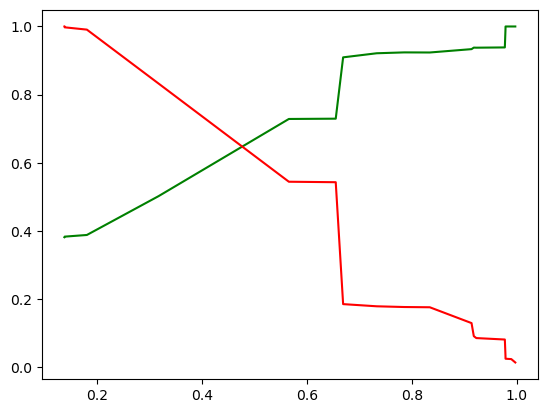

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

4608    1
7935    0
4043    0
7821    0
856     0
       ..
7387    1
3063    1
603     0
4210    1
7352    0
Name: Converted, Length: 1848, dtype: int64

In [150]:
y_Test = main_Test_df.pop('Converted')
X_Test = main_Test_df[col_selected]

In [152]:
X_Scalled_Test = scaller.transform(main_Test_df)

In [153]:
X_Test = X_Test[X_Train.columns]

In [154]:
X_Test_sm = sm.add_constant(X_Test)
y_test_perd = logml2.fit().predict(X_Test_sm)


In [155]:
y_test_perd_final = pd.DataFrame({'Converted': y_Test.values, 'Converted_prob': y_test_perd})

In [156]:
y_test_perd_final['Predicted'] = y_test_perd_final['Converted_prob'].map(lambda x: 1 if x > 0.35 else 0)

In [157]:
accuracy_score(y_test_perd_final['Converted'], y_test_perd_final['Predicted'])

0.7505411255411255

In [158]:
precision_score(y_test_perd_final['Converted'], y_test_perd_final['Predicted'])

0.75